In [1]:
from traffic.core import Traffic
training_trajectories_path = "../data/real/OpenSky_EHAM_LIMC.pkl"
training_trajectories = Traffic.from_file(training_trajectories_path)
synthetic_trajectories_path = "../data/synthetic_compare/OpenSky_EHAM_LIMC.pkl"
synthetic_trajectories = Traffic.from_file(synthetic_trajectories_path)
route_name = "EHAM_LIMC"

/home/murad/synthair/TimeVQVAE/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


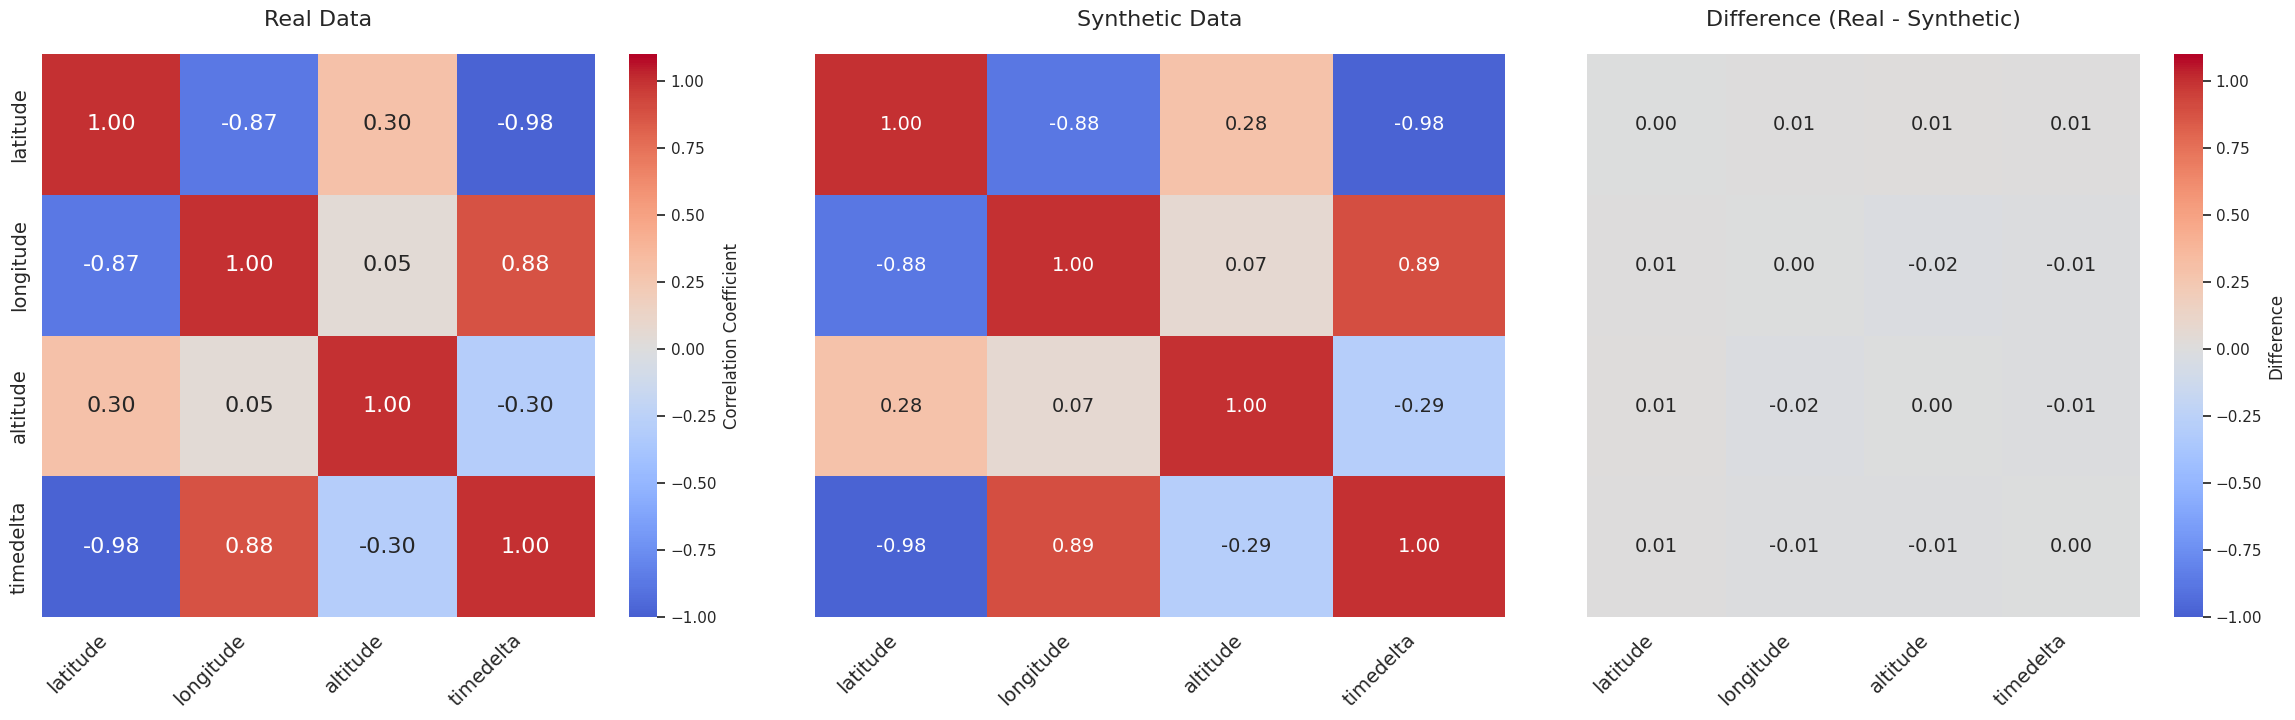

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

def compute_correlation_matrix(data):
    features = ['latitude', 'longitude', 'altitude', 'timedelta']
    return data[features].corr()

def plot_combined_correlation_heatmaps(real_corr, synth_corr, diff_corr, synth_title, cmap='coolwarm', diff_cmap='coolwarm', vmin=-1, vmax=1.1):
    fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Combined figure size
    
    # Row 1: Heatmaps for Real Data, Synthetic Data, and Difference
    sns.heatmap(real_corr, annot=True, fmt=".2f", cmap=cmap, vmin=vmin, vmax=vmax, center=0,
                cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 16}, ax=axes[0])
    axes[0].set_title("Real Data", fontsize=16, pad=20)
    axes[0].set_xticklabels(real_corr.columns, rotation=45, ha='right', fontsize=14)
    axes[0].set_yticklabels(real_corr.columns, fontsize=14)
    
    sns.heatmap(synth_corr, annot=True, fmt=".2f", cmap=cmap, vmin=vmin, vmax=vmax, center=0,
                cbar=False, annot_kws={"size": 14}, ax=axes[1])  # Remove color bar to avoid redundancy
    axes[1].set_title(synth_title, fontsize=16, pad=20)
    axes[1].set_xticklabels(synth_corr.columns, rotation=45, ha='right', fontsize=14)
    axes[1].set_yticklabels([])  # Remove y-axis labels for simplicity
    
    sns.heatmap(diff_corr, annot=True, fmt=".2f", cmap=diff_cmap, vmin=vmin, vmax=vmax, center=0,
                cbar_kws={'label': 'Difference'}, annot_kws={"size": 14}, ax=axes[2])
    axes[2].set_title("Difference (Real - Synthetic)", fontsize=16, pad=20)
    axes[2].set_xticklabels(diff_corr.columns, rotation=45, ha='right', fontsize=14)
    axes[2].set_yticklabels([])  # Remove y-axis labels for simplicity
    
    
    # Adjust the layout to remove any overlap and ensure readability
    plt.tight_layout(pad=3)
    plt.savefig(f'../../SID/SID_paper_sintef/figures/correlation_heatmaps_{route_name}.pdf', bbox_inches='tight')
    
    # Display the plot
    plt.show()

# Compute correlation matrices
real_data = training_trajectories.data
synthetic_data = synthetic_trajectories.data


real_corr = compute_correlation_matrix(real_data)
synth_corr = compute_correlation_matrix(synthetic_data)


# Compute the difference
diff_corr = real_corr - synth_corr


# Plot the combined heatmaps with the specified titles
plot_combined_correlation_heatmaps(real_corr, synth_corr, diff_corr, "Synthetic Data")


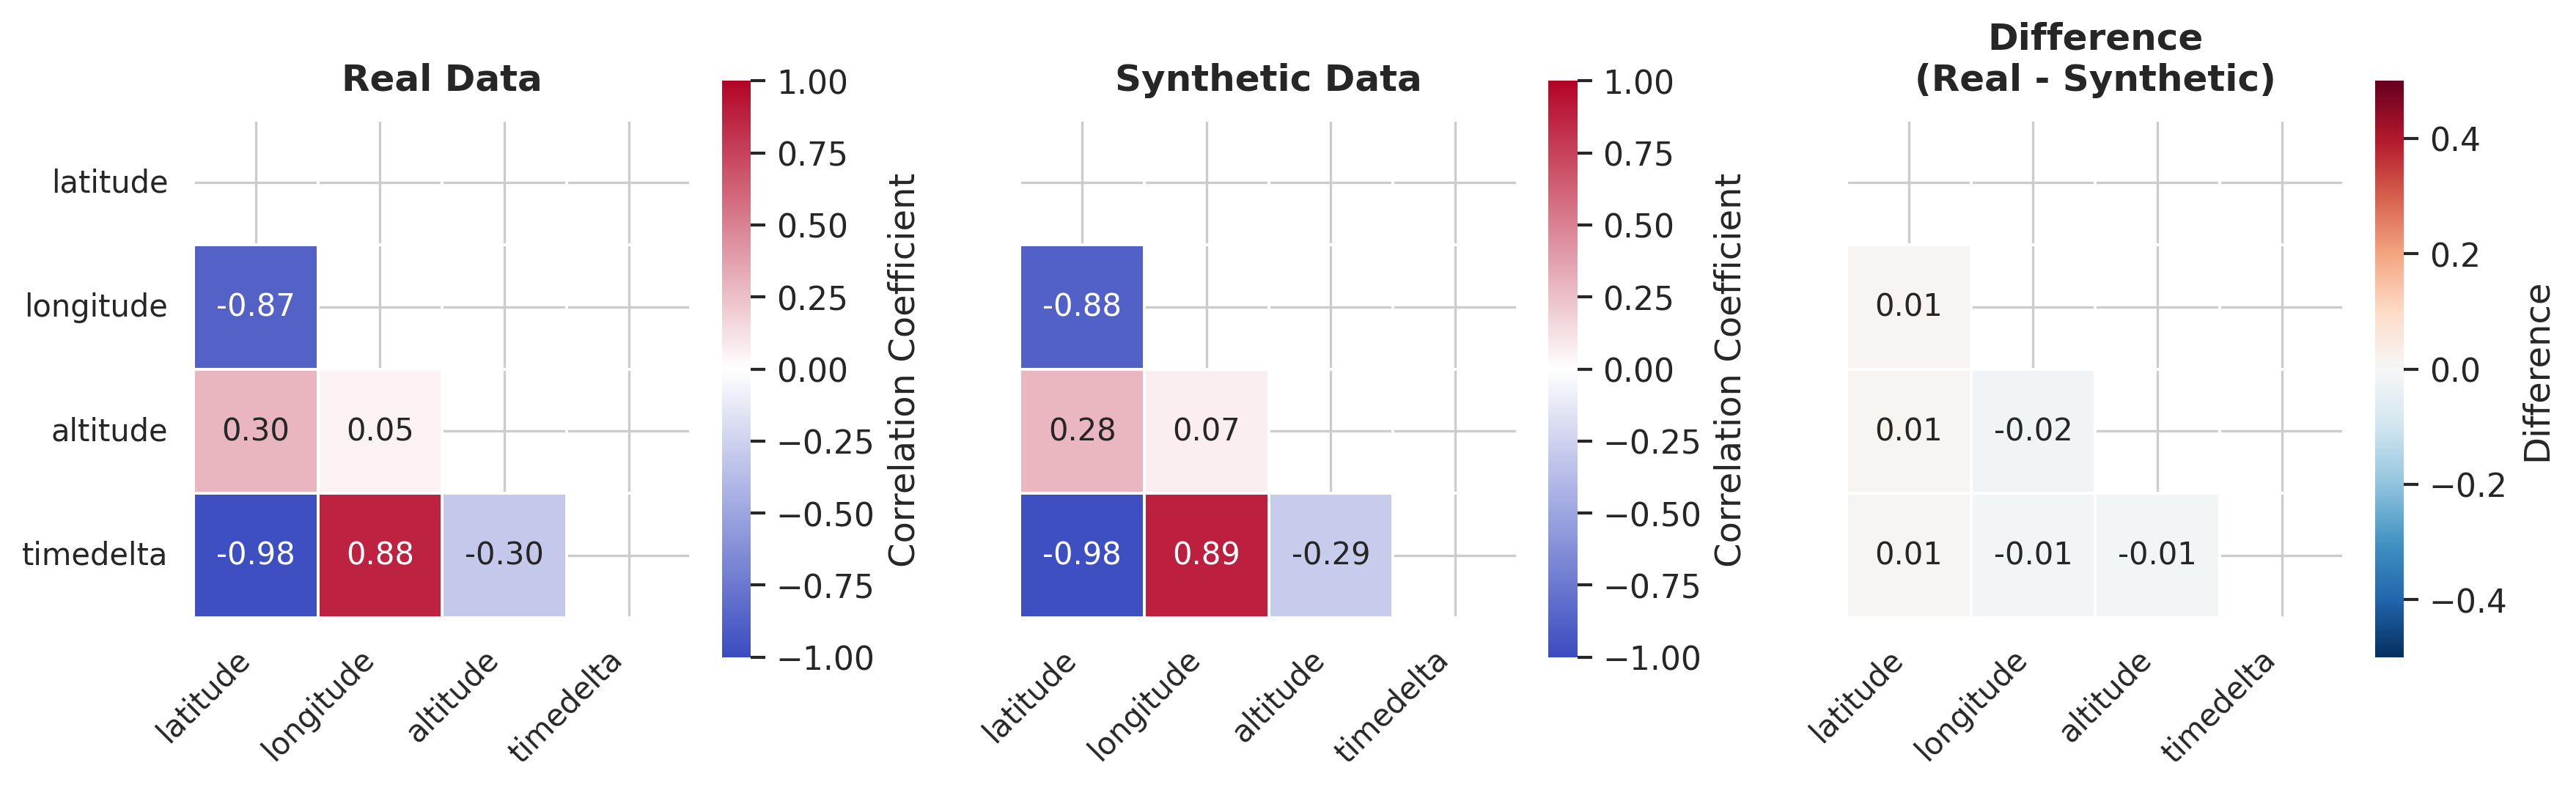

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Set the style for a clean, professional look
# plt.style.use('seaborn-whitegrid')
sns.set_context("paper", font_scale=1.2)

def compute_correlation_matrix(data):
    features = ['latitude', 'longitude', 'altitude', 'timedelta']
    return data[features].corr()

def create_custom_diverging_cmap(name='custom_diverging'):
    colors = ['#3b4cc0', '#ffffff', '#b40426']
    return LinearSegmentedColormap.from_list(name, colors, N=256)

def plot_masked_heatmap(corr_matrix, ax, title, cmap='custom_diverging', vmin=-1, vmax=1, mask=None, cbar_label='Correlation Coefficient'):
    if mask is None:
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix,
                mask=mask,
                annot=True,
                fmt='.2f',
                cmap=cmap,
                vmin=vmin,
                vmax=vmax,
                center=0,
                square=True,
                linewidths=0.5,
                cbar_kws={'label': cbar_label, 'shrink': .8},
                annot_kws={"size": 10},
                ax=ax)
    
    ax.set_title(title, fontsize=12, fontweight='bold', pad=10)
    ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=10)
    ax.set_yticklabels(corr_matrix.columns, rotation=0, fontsize=10)

def plot_combined_correlation_heatmaps(real_corr, synth_corr, diff_corr, synth_title):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=300)
    
    mask = np.triu(np.ones_like(real_corr, dtype=bool))
    custom_cmap = create_custom_diverging_cmap()
    
    plot_masked_heatmap(real_corr, axes[0], "Real Data", cmap=custom_cmap, mask=mask)
    plot_masked_heatmap(synth_corr, axes[1], synth_title, cmap=custom_cmap, mask=mask)
    plot_masked_heatmap(diff_corr, axes[2], "Difference\n(Real - Synthetic)", cmap='RdBu_r', mask=mask, vmin=-0.5, vmax=0.5, cbar_label='Difference')
    
    axes[1].set_yticklabels([])
    axes[2].set_yticklabels([])
    
    plt.tight_layout(pad=1.5)
    plt.savefig(f'../../SID/SID_paper_sintef/figures/correlation_heatmaps_{route_name}.pdf', bbox_inches='tight')
    plt.show()

real_data = training_trajectories.data
synthetic_data = synthetic_trajectories.data

real_corr = compute_correlation_matrix(real_data)
synth_corr = compute_correlation_matrix(synthetic_data)
diff_corr = real_corr - synth_corr

# Plot the combined heatmaps
plot_combined_correlation_heatmaps(real_corr, synth_corr, diff_corr, "Synthetic Data")